# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [6]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Channel = in which kind of store the grocery was done => categorical data to convert
Region = customer location => categorical data to convert
Fresh = money spend in a year on fresh product
Milk = money spend in a year on milk
Grocery = money spend in a year on grocery
Frozen = money spend in a year on frozen product
Detergents_Paper = money spend in a year on detergents and paper products 
Delicassen = money spend in a year on delicatessen products

In [4]:
null_col = customers.isnull().sum()
null_col[null_col>0]

Series([], dtype: int64)

No missing value

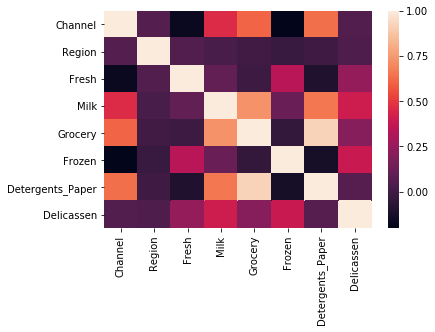

In [7]:
corr = customers.corr()
sns.heatmap(corr)

Seems that Grocery aqnd Detergents_Paper are highly correlated. We have to remove one of those two columns.

In [11]:
customers.describe()

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,60869.000000,40827.000000,47943.000000


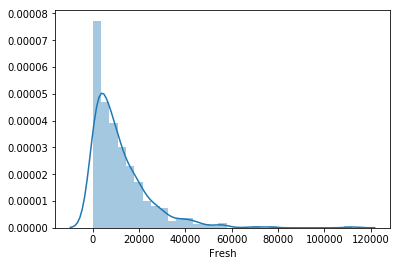

In [12]:
sns.distplot(customers.Fresh)
plt.show()

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [9]:
customers = customers.drop(['Grocery'], axis=1)

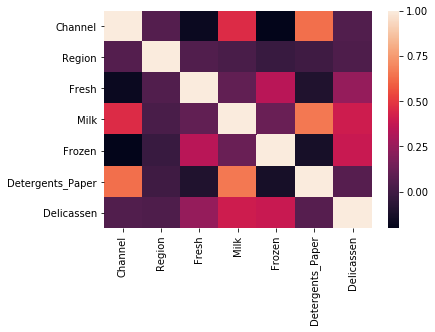

In [10]:
corr = customers.corr()
sns.heatmap(corr)

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size.

In [22]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scaler = StandardScaler()
scaler.fit(customers)
customers_scale = scaler.transform(customers)

C:\Users\Elodie\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Elodie\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans().fit(customers_scale)

In [32]:
customers['labels'] = kmeans.labels_

Count the values in `labels`.

In [33]:
customers.labels.value_counts()

1    201
3     94
0     65
4     41
2     32
6      4
7      2
5      1
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [36]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5).fit(customers_scale)
customers['labels_DBSCAN'] = dbscan.labels_

Count the values in `labels_DBSCAN`.

In [37]:
customers.labels_DBSCAN.value_counts()

-1    203
 2    144
 0     35
 5     23
 7     14
 1      7
 6      6
 3      5
 4      3
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'DBScan')

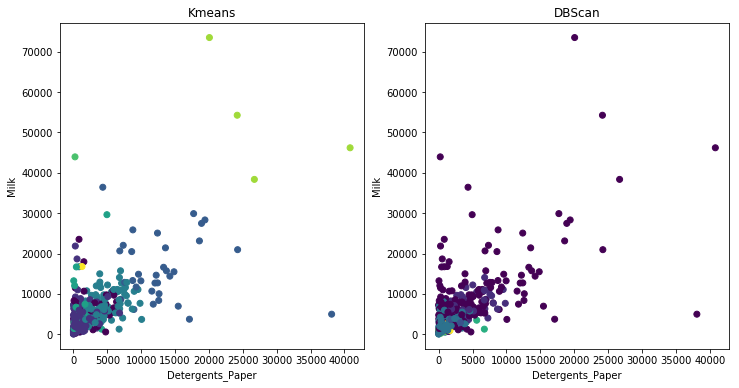

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

axes[0].scatter(customers.Detergents_Paper, customers.Milk, c=customers.labels) 
axes[0].set_xlabel('Detergents_Paper')
axes[0].set_ylabel('Milk')
axes[0].set_title('Kmeans')

axes[1].scatter(customers.Detergents_Paper, customers.Milk, c=customers.labels_DBSCAN) 
axes[1].set_xlabel('Detergents_Paper')
axes[1].set_ylabel('Milk')
axes[1].set_title('DBScan')


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'DBScan')

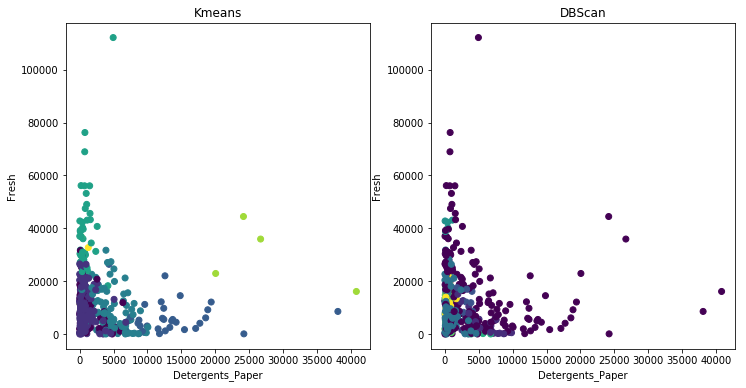

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

axes[0].scatter(customers.Detergents_Paper, customers.Fresh, c=customers.labels) 
axes[0].set_xlabel('Detergents_Paper')
axes[0].set_ylabel('Fresh')
axes[0].set_title('Kmeans')

axes[1].scatter(customers.Detergents_Paper, customers.Fresh, c=customers.labels_DBSCAN) 
axes[1].set_xlabel('Detergents_Paper')
axes[1].set_ylabel('Fresh')
axes[1].set_title('DBScan')

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'DBScan')

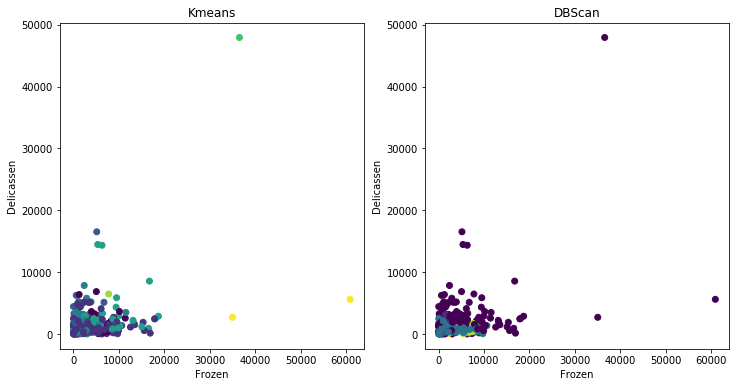

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

axes[0].scatter(customers.Frozen, customers.Delicassen, c=customers.labels) 
axes[0].set_xlabel('Frozen')
axes[0].set_ylabel('Delicassen')
axes[0].set_title('Kmeans')

axes[1].scatter(customers.Frozen, customers.Delicassen, c=customers.labels_DBSCAN) 
axes[1].set_xlabel('Frozen')
axes[1].set_ylabel('Delicassen')
axes[1].set_title('DBScan')

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [49]:
customers.groupby(['labels','labels_DBSCAN']).mean()

Channel    Region         Fresh          Milk  \
labels labels_DBSCAN                                                   
0      -1             1.277778  1.000000  10008.777778   6236.444444   
        5             1.000000  1.000000   9918.217391   1769.347826   
        6             1.000000  1.000000   6823.000000   1943.000000   
1      -1             1.000000  2.733333   9726.066667   5287.600000   
        2             1.000000  3.000000   8515.859155   2121.971831   
        7             1.000000  2.000000  11414.571429   1625.214286   
2      -1             2.000000  2.250000   6311.218750  16513.750000   
3      -1             2.000000  2.775510  11690.938776   7876.714286   
        0             2.000000  3.000000   4068.971429   8220.371429   
        1             2.000000  3.000000  13078.571429   3464.428571   
        4             2.000000  3.000000     80.000000   2458.666667   
4      -1             1.058824  2.735294  40217.058824   5650.235294   
        2             1.000000  3.000000  30034.500000   1188.500000   
        3             1.000000  3.000000  41446.600000   1421.200000   
5      -1             1.000000  3.000000  36847.000000  43950.000000   
6      -1             2.000000  3.000000  29862.500000  53080.750000   
7      -1             1.000000  2.500000  22015.500000   9937.000000   

                            Frozen  Detergents_Paper    Delicassen  
labels labels_DBSCAN                                                
0      -1              2748.305556       2346.277778   1683.138889  
        5              1600.739130        345.173913    670.260870  
        6              6780.333333        386.500000    613.666667  
1      -1              5096.400000       1132.133333   1845.911111  
        2              2141.084507        629.239437    748.598592  
        7              2337.357143        505.142857    860.928571  
2      -1              1757.281250      13341.250000   2497.718750  
3      -1              2079.224490       4597.795918   1669.163265  
        0               843.485714       5262.514286   1425.771429  
        1               790.571429       3260.142857    315.428571  
        4               413.666667       5413.000000    331.000000  
4      -1              7593.558824       1004.647059   2964.705882  
        2              2340.500000        356.500000    855.000000  
        3              1276.400000        416.200000    784.800000  
5      -1             36534.000000        239.000000  47943.000000  
6      -1              3262.250000      27942.250000   3082.250000  
7      -1             47939.000000        671.500000   4153.500000

Which algorithm appears to perform better?

In [ ]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here